In [16]:
import numpy as np
import pandas as pd

from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

from IPython.display import display, HTML, Image
from IPython.display import SVG

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_train = pd.read_csv("./fashion-mnist_train.csv")
data_test = pd.read_csv("./fashion-mnist_test.csv")

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

X_train, X_val, y_train,y_val = train_test_split(X, y, test_size=0.2, random_state=10)

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

In [3]:
print(X_train.shape)
print(X_val.shape)

(48000, 784)
(12000, 784)


In [4]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_val /= 255
X_test /= 255

In [5]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

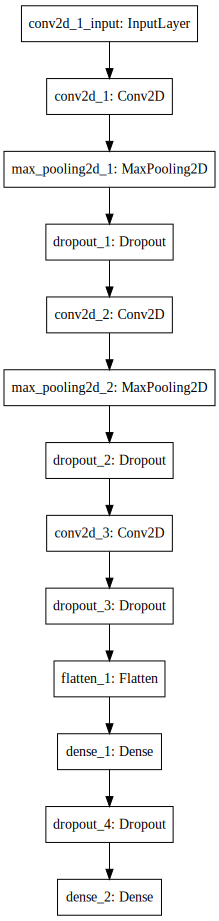

In [6]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), \
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [10]:
history = model.fit(X_train, y_train,
                   batch_size = 256,
                   epochs=10,
                   verbose=1,
                   validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.8768 - acc: 0.6701 - val_loss: 0.5385 - val_acc: 0.8054
Epoch 2/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.5343 - acc: 0.8013 - val_loss: 0.4212 - val_acc: 0.8470
Epoch 3/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4591 - acc: 0.8313 - val_loss: 0.3721 - val_acc: 0.8632
Epoch 4/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4109 - acc: 0.8502 - val_loss: 0.3388 - val_acc: 0.8732
Epoch 5/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.3819 - acc: 0.8595 - val_loss: 0.3238 - val_acc: 0.8780
Epoch 6/10
48000/48000 [==============================] - 56s 1ms/step - loss: 0.3569 - acc: 0.8705 - val_loss: 0.2917 - val_acc: 0.8942
Epoch 7/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.3413 - acc: 0.8757 - val_loss: 0.2849 - val_acc

In [11]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.247014898038
Test accuracy: 0.9078


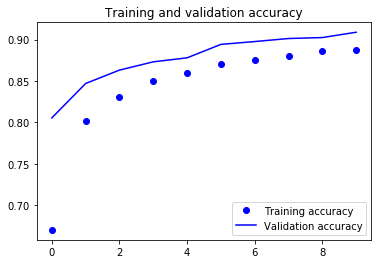

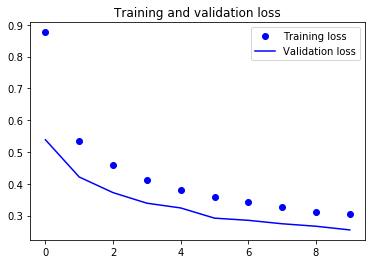

In [14]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [15]:
predicted_classes = model.predict_classes(X_test)

y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes == y_true)[0]
incorrect = np.nonzero(predicted_classes != y_true)[0]

In [20]:
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.82      0.88      0.85      1000
    Class 1       0.99      0.98      0.99      1000
    Class 2       0.86      0.86      0.86      1000
    Class 3       0.90      0.93      0.92      1000
    Class 4       0.86      0.87      0.87      1000
    Class 5       0.97      0.98      0.98      1000
    Class 6       0.76      0.67      0.71      1000
    Class 7       0.95      0.95      0.95      1000
    Class 8       0.98      0.98      0.98      1000
    Class 9       0.96      0.96      0.96      1000

avg / total       0.91      0.91      0.91     10000



A subset of correctly predicted classes:

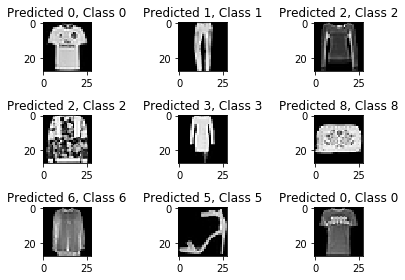

In [21]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_true[correct]))
    plt.tight_layout()

A subset of incorrectly predicted classes:

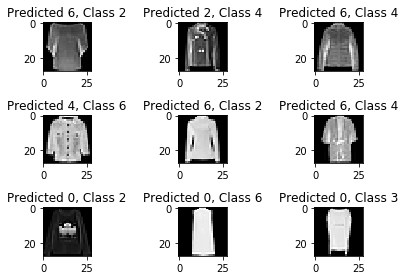

In [23]:
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_true[incorrect]))
    plt.tight_layout()